In [142]:
import pandas as pd
import numpy as np

In [143]:
# get data
data = pd.read_csv("../전처리/전처리_최종_V2.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [144]:
# 발행회차, 일자, 기준월을 그룹화하여 재정렬
# test2 = data.groupby(['발행회차','발행일자','기준월']).sum()
# test2.to_csv("../전처리/mbs_groupby.csv", encoding="CP949")

In [145]:
# 재정렬 결과 가져오기
# test3 = pd.read_csv("../전처리/mbs_groupby.csv", encoding="CP949")
# test3

In [146]:
# MBS 처리를 위한 시험용 코드
# test_drop = test3.drop_duplicates(['기준우']).reset_index()

In [147]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

# 금리 차이 구하기
data_a['금리차'] = data_a['예금은행 대출금리'] - data_a['가중평균발행금리']
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,조기상환율,금리차
기준월,,,,,,,,,,,,
2004-06,0.510000,5.040000,52.743,51.435,72.119,794.0,785.79,5.99,60.660000,34.530000,0.510000,0.950000
2004-07,0.270000,5.020000,52.603,51.040,72.561,858.0,735.34,5.93,61.090000,29.270000,0.270000,0.910000
2004-08,0.270000,4.846667,52.394,50.554,73.191,842.0,803.57,5.80,60.920000,31.370000,0.270000,0.953333
2004-09,0.380000,4.700000,52.283,50.314,73.191,784.0,835.09,5.63,60.830000,32.417500,0.380000,0.930000
2004-10,0.508000,4.600000,52.157,50.090,73.191,801.0,834.84,5.57,60.896000,33.138000,0.508000,0.970000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.207,100.197,105.300,800.0,2699.18,3.88,60.585462,30.043799,0.929633,1.401261
2022-03,0.839380,2.477937,100.306,100.337,106.060,798.0,2757.65,3.84,60.576111,30.068175,0.825611,1.362063
2022-04,0.888984,2.463891,100.517,100.543,106.850,813.0,2695.05,3.90,60.578833,30.048621,0.892509,1.436109


- 만기전 상환율 : Target -> 건드리지 마
- 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 건드리지 마
- 주택종합 매매가격지수, 전세가격지수 : lag 처리
- 실업자, 소비자물가지수 : lag 처리하고 log 처리
- 예금은행대출금리, 코스피 : lag 처리 하고 log 차분

In [148]:
data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)

In [149]:
# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)
data_a.drop(columns=['조기상환율'], inplace=True)

In [150]:
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,금리차
기준월,,,,,,,,,,,
2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,0.910000
2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,0.953333
2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,0.930000
2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,0.970000
2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,0.955000
...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,1.401261
2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,1.362063
2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,1.436109


### 기초통계량 분석

In [151]:
# 데이터프레임의 정보, 결측치 확인
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  금리차          214 non-null    float64
dtypes: float64(11)
memory usage: 20.1+ KB


In [152]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
금리차            0
dtype: int64

In [153]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,금리차
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.541086
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.548305
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812188,29.270000,-0.394975
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.175415
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.480000
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,0.834844
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,2.343235


In [154]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,금리차
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.548215
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.567762
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.295772
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.469382
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.497749
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.502627
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.279992
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.769832
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.290333
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.178575


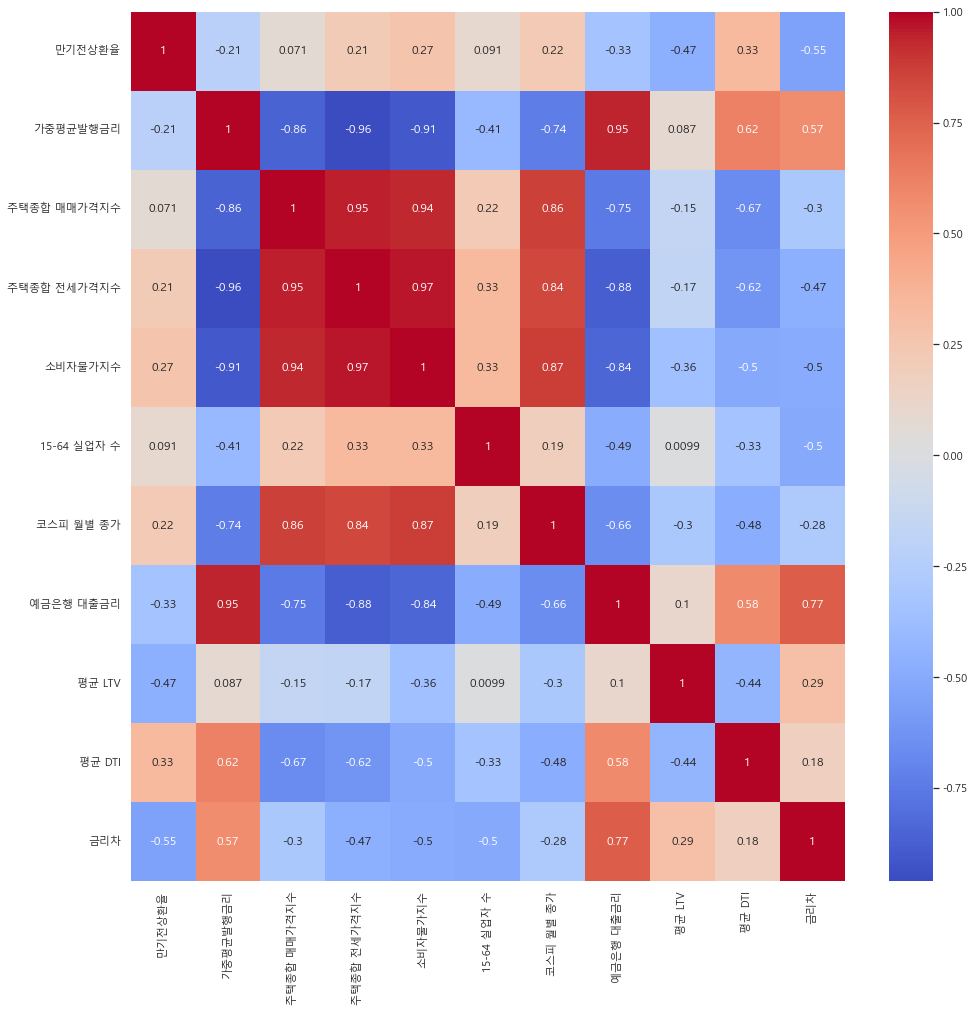

In [155]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

### 현재 상관관계가 굉장히 높은 것들 (> |0.7|)
1. 가중평균발행금리 & 금리의 차이
2. 주택종합 매매가격지수 & 주택종합 전세가격지수
3. 소비자 물가지수 & 주택종합 매매가격지수
4. 소비자 물가지수 & 주택종합 전세가격지수
5. 코스피 월별종가 & 주택종합 매매가격지수
6. 코스피 월별종가 & 주택종합 전세가격지수

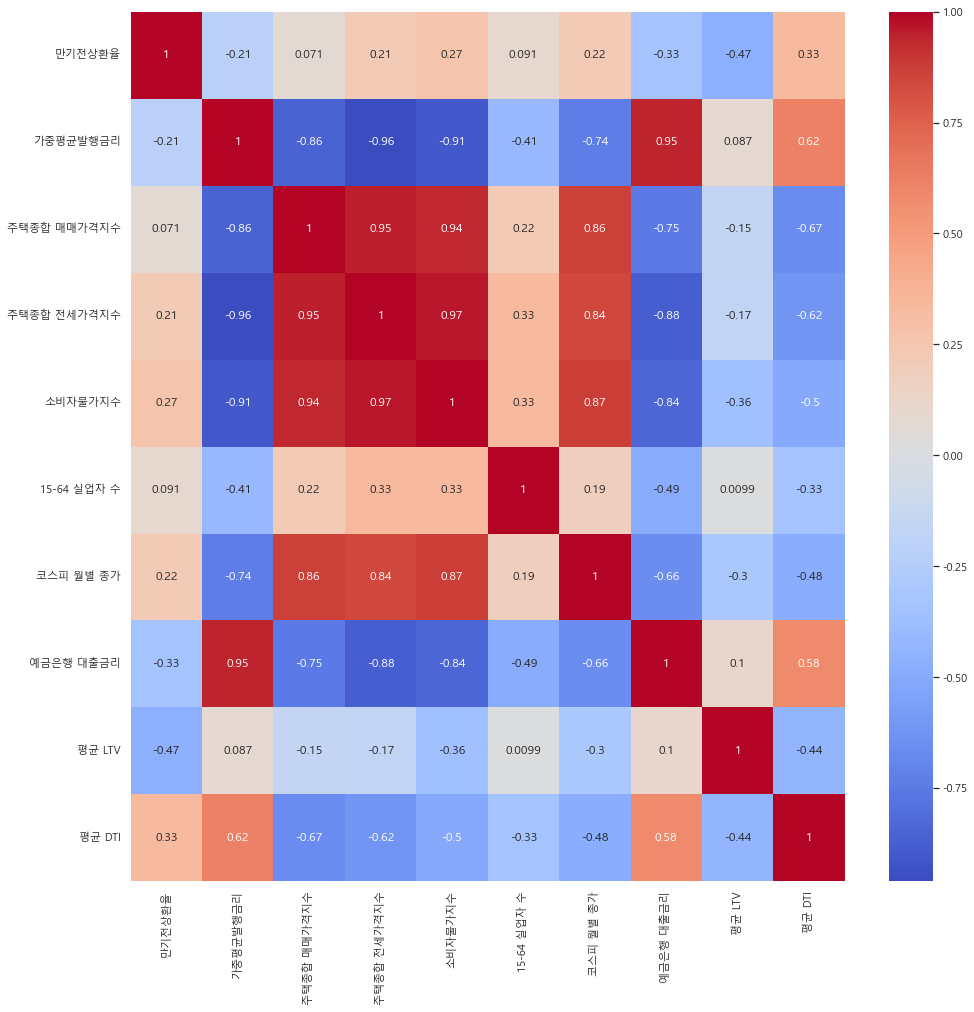

In [156]:
# 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정
data_b = data_a.copy()
data_b.drop(columns=['금리차'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [157]:
2 ** 10

1024

#### if Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같습니다 (못 써요)
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

In [158]:
# lag 등을 고려하지 않고 현재 데이터에서 그냥 회귀분석

data_c = data_b.copy().reset_index()
data_c

,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI
0,2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000
1,2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000
2,2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500
3,2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000
4,2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333
...,...,...,...,...,...,...,...,...,...,...,...
209,2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799
210,2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175
211,2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621
212,2022-05,0.828517,2.447768,100.517,100.543,4.671426,6.700731,7.899172,1.360977,60.550400,30.002507


In [167]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

# Training
# scaler.fit(mm_df)

# Traning & Scaling
mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI
0,0.922279,0.023902,0.045411,0.000000,0.270948,0.044228,0.796034,0.779071,0.000000
1,0.860130,0.021056,0.037775,0.015285,0.411797,0.000000,0.787312,0.738665,0.404489
2,0.807542,0.016809,0.028379,0.036912,0.377595,0.059141,0.768107,0.717274,0.606252
3,0.771687,0.014553,0.023740,0.036912,0.247920,0.084785,0.742334,0.732961,0.745031
4,0.741210,0.011992,0.019409,0.036912,0.286896,0.084586,0.733051,0.752134,0.796137
...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.984264,0.932341,0.238626,0.857809,0.413075,0.659152,0.149045
210,0.010817,0.988598,0.988072,0.946876,0.284627,0.866718,0.419800,0.656930,0.153740
211,0.005781,0.990610,0.990779,0.964867,0.280079,0.881002,0.410822,0.657576,0.149973
212,0.000000,0.994898,0.994761,0.983432,0.313914,0.865698,0.424255,0.650819,0.141091


In [168]:
# Min-Max 스케일링 잘 됐는지 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.444594,0.545529,0.442031,0.608737,0.471166,0.490067,0.619326
std,0.342226,0.224773,0.291382,0.265811,0.239491,0.191978,0.272720,0.275303,0.253078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.141727,0.339965,0.272091,0.530060,0.244010,0.295559,0.429185
50%,0.345682,0.389199,0.475294,0.632525,0.401178,0.655505,0.424255,0.512553,0.674756
75%,0.844064,0.521072,0.705189,0.766320,0.596864,0.701062,0.714181,0.653614,0.832489
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

feature_data = mm_result
#data = test6[['주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '금리차']]
target = data_a['만기전상환율']

ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1)

# cross_val_score ==> default = 5-fold
rid_mse_score = cross_val_score(ridge, feature_data, target, scoring="neg_mean_squared_error")
sso_mse_score = cross_val_score(lasso, feature_data, target, scoring="neg_mean_squared_error")
ela_mse_score = cross_val_score(elastic, feature_data, target, scoring="neg_mean_squared_error")

rid_rmse_score = np.sqrt(-1 * rid_mse_score)
sso_rmse_score = np.sqrt(-1 * sso_mse_score)
ela_rmse_score = np.sqrt(-1 * ela_mse_score)

rid_avg_rmse = np.mean(rid_rmse_score)
sso_avg_rmse = np.mean(sso_rmse_score)
ela_avg_rmse = np.mean(ela_rmse_score)

print(f'Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
print(f'Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
print(f'Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

print(f'Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
print(f'Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
print(f'Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

print(f'Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
print(f'Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
print(f'Elastic AVG RMSE : {ela_avg_rmse:.3f}')

Ridge Negative MSE score : [-1.268 -1.003 -0.994 -2.071 -1.142]
Ridge RMSE scores : [1.126 1.001 0.997 1.439 1.069]
Ridge AVG RMSE : 1.126

Lasso Negative MSE score : [-1.579 -0.757 -2.821 -3.866 -2.297]
Lasso RMSE scores : [1.257 0.87  1.68  1.966 1.516]
Lasso AVG RMSE : 1.458

Elastic Negative MSE score : [-0.885 -0.582 -2.43  -3.683 -2.527]
Elastic RMSE scores : [0.941 0.763 1.559 1.919 1.59 ]
Elastic AVG RMSE : 1.354


In [175]:
# 알파는 과연 얼마나 주는 것이 바람직한가
# alpha 0.1 확정?
# 논문에서는 alpha를 0부터 1까지 0.01 단위로 올려서 gridSearch 수행함 (최적의 알파를 찾으려고?)
# 그렇다면 알파를 찾아봅시다...는 코드 짜고 (알파값에 따라 릿지, 라쏘 중 누가 더 유리한지도 찾아보고)

import warnings
warnings.filterwarnings('ignore')

alphas = [0, 0.01, 0.05, 0.1, 0.5, 1]

for alpha in alphas:
    rid_mse_score = cross_val_score(ridge, feature_data, target, scoring="neg_mean_squared_error")
    sso_mse_score = cross_val_score(lasso, feature_data, target, scoring="neg_mean_squared_error")
    ela_mse_score = cross_val_score(elastic, feature_data, target, scoring="neg_mean_squared_error")

    rid_rmse_score = np.sqrt(-1 * rid_mse_score)
    sso_rmse_score = np.sqrt(-1 * sso_mse_score)
    ela_rmse_score = np.sqrt(-1 * ela_mse_score)

    rid_avg_rmse = np.mean(rid_rmse_score)
    sso_avg_rmse = np.mean(sso_rmse_score)
    ela_avg_rmse = np.mean(ela_rmse_score)

    print(f'{alpha}\n')
    print(f'Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
    print(f'Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
    print(f'Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

    print(f'Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
    print(f'Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
    print(f'Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

    print(f'Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
    print(f'Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
    print(f'Elastic AVG RMSE : {ela_avg_rmse:.3f}\n')

0

Ridge Negative MSE score : [-1.268 -1.003 -0.994 -2.071 -1.142]
Ridge RMSE scores : [1.126 1.001 0.997 1.439 1.069]
Ridge AVG RMSE : 1.126

Lasso Negative MSE score : [-1.579 -0.757 -2.821 -3.866 -2.297]
Lasso RMSE scores : [1.257 0.87  1.68  1.966 1.516]
Lasso AVG RMSE : 1.458

Elastic Negative MSE score : [-0.885 -0.582 -2.43  -3.683 -2.527]
Elastic RMSE scores : [0.941 0.763 1.559 1.919 1.59 ]
Elastic AVG RMSE : 1.354

0.01

Ridge Negative MSE score : [-1.268 -1.003 -0.994 -2.071 -1.142]
Ridge RMSE scores : [1.126 1.001 0.997 1.439 1.069]
Ridge AVG RMSE : 1.126

Lasso Negative MSE score : [-1.579 -0.757 -2.821 -3.866 -2.297]
Lasso RMSE scores : [1.257 0.87  1.68  1.966 1.516]
Lasso AVG RMSE : 1.458

Elastic Negative MSE score : [-0.885 -0.582 -2.43  -3.683 -2.527]
Elastic RMSE scores : [0.941 0.763 1.559 1.919 1.59 ]
Elastic AVG RMSE : 1.354

0.05

Ridge Negative MSE score : [-1.268 -1.003 -0.994 -2.071 -1.142]
Ridge RMSE scores : [1.126 1.001 0.997 1.439 1.069]
Ridge AVG RMSE : 

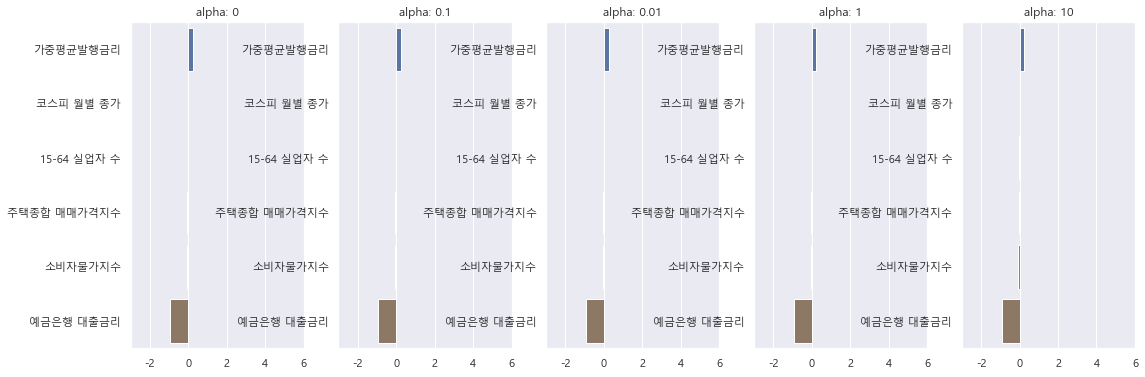

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246184    0.246183     0.246184  0.246178   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002640   -0.002640    -0.002640 -0.002639  -0.002638
주택종합 매매가격지수 -0.052596   -0.052597    -0.052596 -0.052605  -0.052685
소비자물가지수     -0.060319   -0.060316    -0.060318 -0.060296  -0.060096
예금은행 대출금리   -0.930051   -0.930040    -0.930049 -0.929945  -0.929001


In [ ]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
ridge_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(ridge_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246184,0.246183,0.246184,0.246178,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002640,-0.002640,-0.002640,-0.002639,-0.002638
주택종합 매매가격지수,-0.052596,-0.052597,-0.052596,-0.052605,-0.052685
소비자물가지수,-0.060319,-0.060316,-0.060318,-0.060296,-0.060096
예금은행 대출금리,-0.930051,-0.930040,-0.930049,-0.929945,-0.929001


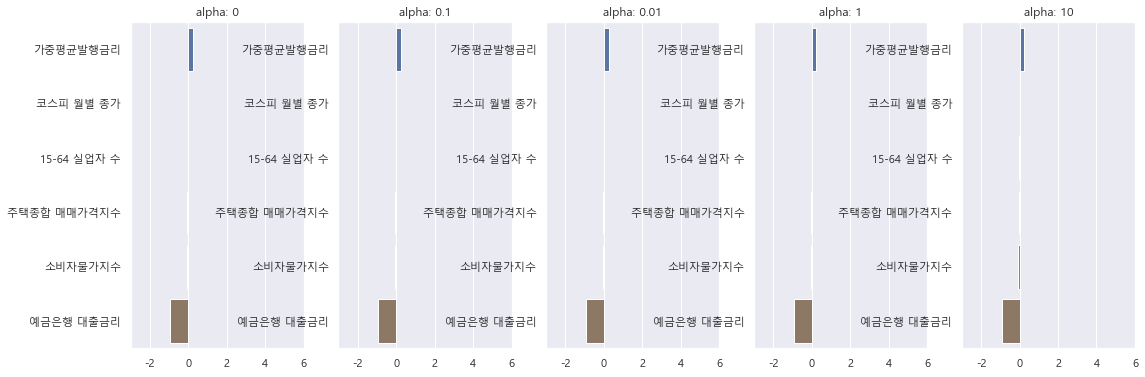

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [ ]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
lasso_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(lasso_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001


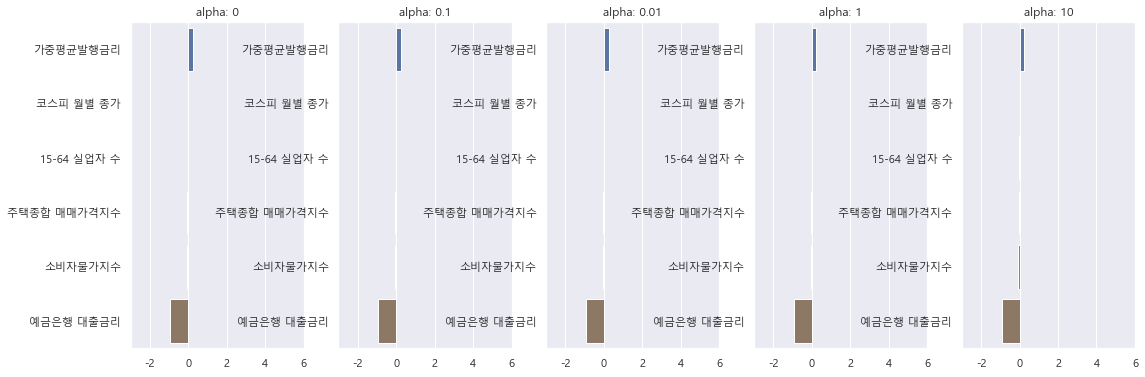

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [ ]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
elastic_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(elastic_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [ ]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001
